# Description
**This program predicts the closing price of Apple stocks using the past 60 days
with the use of a neural network model called LSTM**


In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


# Stacked LSTM model with normal train test split

## Data manipulation and visualization

Data set shape: (2193, 6)


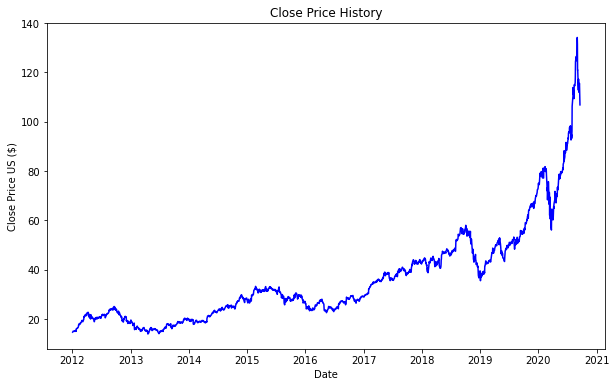

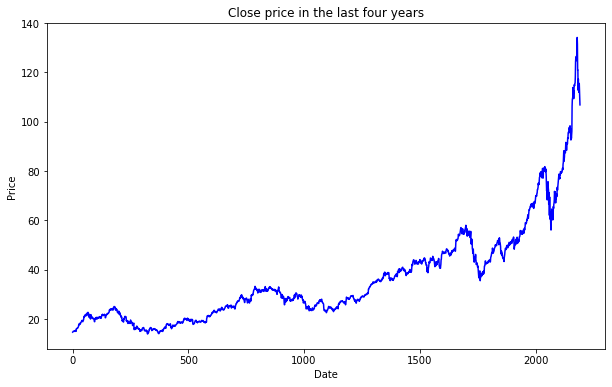

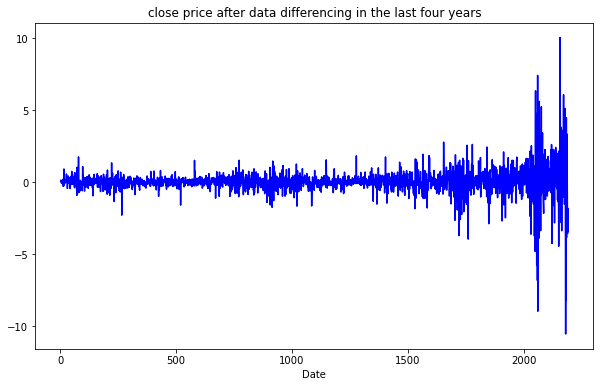

Training set shape: (1754, 1)
Testing set shape: (498, 1)


In [10]:
from utilities.data_manipulation import get_data
df, x_train, y_train, x_test, y_test, training_data_len,close_last_two_years_df, real_test_data, test_data = get_data()


## LSTM Model building and training

In [21]:
from utilities.get_model import get_model
from tensorflow.keras.callbacks import EarlyStopping
model = get_model(x_train, first_layer_units=40, second_layer_units=40, thirds_layer_units=60)
# training the model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights = True, verbose=10)
model.fit(x=x_train, y=y_train, batch_size=64, epochs=40,shuffle=False,validation_split=0.1, callbacks=[early_stopping])

Train on 1524 samples, validate on 170 samples
Epoch 1/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1700 - MAE: 0.2890 - val_loss: 0.7808 - val_MAE: 0.6395
Epoch 2/40
1524/1524 [==============================] - 2s 1ms/step - loss: 0.1700 - MAE: 0.2890 - val_loss: 0.7809 - val_MAE: 0.6394
Epoch 3/40
1524/1524 [==============================] - 2s 1ms/step - loss: 0.1698 - MAE: 0.2890 - val_loss: 0.7810 - val_MAE: 0.6393
Epoch 4/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1698 - MAE: 0.2891 - val_loss: 0.7811 - val_MAE: 0.6393
Epoch 5/40
1524/1524 [==============================] - 2s 2ms/step - loss: 0.1697 - MAE: 0.2888 - val_loss: 0.7811 - val_MAE: 0.6392
Epoch 6/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1697 - MAE: 0.2888 - val_loss: 0.7812 - val_MAE: 0.6392
Epoch 7/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1699 - MAE: 0.2891 - val_loss: 0.7812 - val_MAE: 0.6392
Epoch 8/40
1524

## Getting predictions


In [38]:
from utilities.prediction import predict
real_data_prediction , validation_df, recent_data = predict(model, x_test, y_test, training_data_len, close_last_two_years_df, df)

(438, 1)
RMSE value: 1.7925395563878548


C:\Users\Houssini\Desktop\UNI\GP\LSTM\utilities\prediction.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df.iloc['predictions'] = real_data_prediction


##  predicrted VS real values


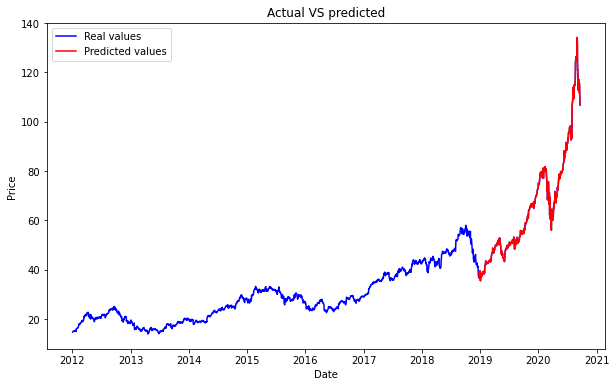

In [35]:
from utilities.visuals import plotting
plotting(recent_data['Close'], title="Actual VS predicted", y_label="Price", data2=validation_df['predictions'])


# BiLSTM model with rolling window in train test split

## Data manipulation

In [61]:
from utilities.data_prep_RW import data, to_sequences, preprocess

SEQ_LEN = 50
"""Walk forward validation: 
Initial SEQ_LEN is defined above, so, walk forward will be shifting one position to the right and create another sequence.
The process is repeated until all possible positions are used."""

scaled_close = data()
x_train_bi, y_train_bi, x_test_bi, y_test_bi = preprocess(scaled_close, SEQ_LEN, train_split = 0.8)
print('x_train_bi.shape:',x_train_bi.shape, 'x_test_bi.shape:', x_test_bi.shape)

x_train_bi.shape: (1713, 49, 1) x_test_bi.shape: (429, 49, 1)


## Model building and training


In [62]:
from utilities.Bilstm_RW import get_model
from tensorflow.keras.callbacks import EarlyStopping
WINDOW_SIZE = SEQ_LEN - 1
model = get_model(WINDOW_SIZE, x_train_bi)
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights = True,verbose=1)
history = model.fit(x_train_bi, y_train_bi, epochs=50, batch_size=128 , shuffle=False,validation_split=0.1,  callbacks=[early_stopping])

Train on 1541 samples, validate on 172 samples
Epoch 1/50
1541/1541 [==============================] - 7s 5ms/step - loss: 0.1698 - MAE: 0.2895 - val_loss: 0.9191 - val_MAE: 0.6764
Epoch 2/50
1541/1541 [==============================] - 5s 4ms/step - loss: 0.1693 - MAE: 0.2887 - val_loss: 0.9254 - val_MAE: 0.6793
Epoch 3/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1693 - MAE: 0.2889 - val_loss: 0.9277 - val_MAE: 0.6806
Epoch 4/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1693 - MAE: 0.2891 - val_loss: 0.9287 - val_MAE: 0.6805
Epoch 5/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1693 - MAE: 0.2892 - val_loss: 0.9284 - val_MAE: 0.6800
Epoch 6/50
1541/1541 [==============================] - 7s 4ms/step - loss: 0.1695 - MAE: 0.2894 - val_loss: 0.9280 - val_MAE: 0.6799
Epoch 7/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1696 - MAE: 0.2899 - val_loss: 0.9281 - val_MAE: 0.6810
Epoch 8/50
1541